# ___

# [ Machine Learning in Geosciences ]

### | Topic: **GeoPython and Satellite Earth observation (Sentinel-2) for Machine Learning projects** 

### | Thematic focus: vegetation greeness 

.....................................................................................................................

Author: *Lukas Brodsky* *lukas.brodsky@natur.cuni.cz* 

Project: ESF pro VŠ II na UK | Reg. číslo: CZ.02.2.69/0.0/0.0/18_056/0013322

---

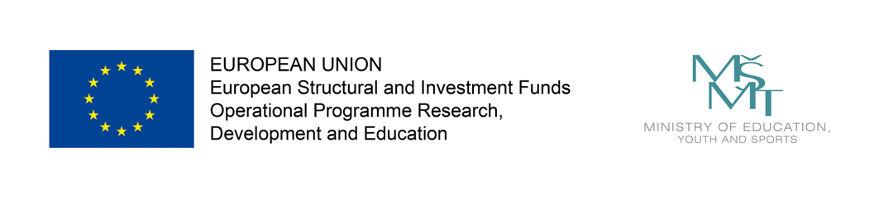

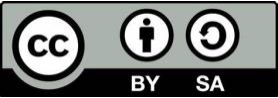

# 1. Problem definition 

### 1.1 Background

Vegetation greenness is a vital indicator of plant health, biomass, and ecosystem productivity. Remote sensing techniques, using satellite imagery, have become essential for monitoring vegetation across large geographic areas. One of the most common measures of vegetation greenness is the Normalized Difference Vegetation Index (NDVI), which is calculated using the red and near-infrared (NIR) bands from satellite images.

Python has become a powerful tool for geospatial data analysis, thanks to libraries such as Rasterio and EarthPy. Rasterio simplifies reading, writing, and processing raster data, while EarthPy provides higher-level functions for working with spatial data and visualizing results effectively. Together, they provide a robust framework for analyzing satellite data and monitoring vegetation changes over time.


### 1.2. Objective: 

The objective of this notebook is to demonstrate how to analyze vegetation greenness using satellite imagery with Python. Specifically, this notebook aims to:

* Load and explore raster data using Rasterio.
* Preprocess satellite imagery for vegetation analysis.
* Plot the Sentinel-2 bands and histograms. 
* Plot RGB composites of the multispectral imagery. 
* Calculate NDVI from red and near-infrared bands.
* Visualize NDVI maps using EarthPy. 
* Interpret NDVI values to assess vegetation health and distribution.
* Calculate other indexes: SAVI, NDMI, etc. 
* Save the results (e.g. NDVI) to file system in GeoTIFF format. 

### 1.3 Expected results 

* Learn using GeoPython packages **Rasterio** and **EarthPy** for vegetation greeness calculations using Sentinel-2 satellite imagery. 



### Rasterio 

**Rasterio: access to geospatial raster data** 

Geographic information systems use GeoTIFF and other formats to organize and store gridded raster datasets such as satellite imagery and terrain models. Rasterio reads and writes these formats and provides a Python API based on Numpy N-dimensional arrays and GeoJSON.

    
Please refer to **[Rasterio official documentation](https://rasterio.readthedocs.io/en/stable/)**


### EarthPy

**EarthPy: A Python Package for Earth Data**

EarthPy is a python package that makes it easier to plot and work with spatial raster and vector data using open source tools. Earthpy depends upon geopandas which has a focus on vector data and rasterio with facilitates input and output of raster data files. It also requires matplotlib for plotting operations.

EarthPy’s goal is to make working with spatial data easier for scientists. Contributions to EarthPy are welcome.

Please refer to **[EarthPy official documentation](https://earthpy.readthedocs.io/en/latest/)**

In [ ]:
# To instal rasterio 
# https://rasterio.readthedocs.io/en/stable/installation.html

# ! pip install rasterio 

# python -m pip install --user -U pip
# GDAL_CONFIG=/path/to/gdal-config python -m pip install --user --no-binary rasterio rasterio

In [ ]:
# To install EarthPy, use pip. --upgrade is optional but it ensures that the package overwrites 
# when you install and you have the current version. If you don’t have the package yet you can still 
# use the --upgrade argument.

# ! pip install earthpy

In [ ]:
import os
from glob import glob
# Rasterio 
import rasterio as rio
import numpy as np
# EarthPy 
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 2. Data

In [ ]:
# Download data from GDrive: 
# https://drive.google.com/drive/folders/1QEE7RC5MI0ZZO2sl9o8vXPPXsAR3pVnd?usp=drive_link 

# locally
# path = './data/08_LAB_mlgeo_rasterio/'
path = '/Users/lukas/Work/prfuk/ownCloud/Vyuka/Machine_learning_geosciences/data/Sentinel-2_vegetation'
os.chdir(path)

In [ ]:
os.listdir()

In [ ]:
file_name = os.path.join(path, os.listdir()[0])

In [ ]:
os.path.isfile(file_name)

### Read image

In [ ]:
# Sentinel-2 bands: blue, green red, 
sentinel2_bands = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12']

In [ ]:
# Read the iamge with method open()
with rio.open(file_name, 'r') as f:
    image = f.read()

In [ ]:
image.shape

### Raster metadata

In [ ]:
ds = rio.open(file_name)
ds

In [ ]:
print(f'Dataset: {ds}')
print(f'Typ datasetu: {type(ds)}')

In [ ]:
# Image metadata 
print(f'Bands: {ds.count}') # features for ML 
print(f'Image width: {ds.width}')
print(f'Image height: {ds.height}')

In [ ]:
# Raster file metadata 
meta = ds.meta
print(type(meta))
print('Metadata od the dataset: ...')
for k in meta:
    print(k, meta[k])

In [ ]:
# Bbox
print(f'Bbox: {ds.bounds}')

In [ ]:
# Transformation parameters 
print(f'Geotransformation parameters: {ds.transform}')

### Visualize Bands

In [ ]:
ep.plot_bands(image, cmap='gist_earth', figsize=(10, 15), cols=3, cbar = False)

### RGB Composite Image

In [ ]:
# RGB Composite Image
rgb = ep.plot_rgb(image, 
                  rgb=(3,2,1), 
                  figsize=(10, 15))

In [ ]:
ep.plot_rgb(
    image,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.1,
    figsize=(10, 15),
    title="RGB Composite Image with Stretch Applied",
)

In [ ]:
# False-colour Composite Image with Strech
ep.plot_rgb(image,
            rgb=(9, 7, 2),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 15), 
            title="False-colour Composite Image with Stretch Applied")

In [ ]:
# False-colour Composite Image with Strech
ep.plot_rgb(image,
            rgb=(7, 9, 4),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 15), 
            title="False-colour Composite Image with Stretch Applied")

### Vegetation greeness from Sentinel-2 

To assess vegetation greenness and health, researchers analyze the way plants reflect light in different wavelengths. Healthy vegetation absorbs most visible red light (VIS) for photosynthesis while strongly reflecting near-infrared (NIR) light. The Normalized Difference Vegetation Index (NDVI) is a widely used metric that quantifies vegetation by comparing these reflections. It is calculated as the difference between NIR and red light, normalized over their sum. NDVI values range from -1 to +1, where higher values indicate denser and healthier vegetation, while lower values suggest sparse or stressed plant cover.

### NDVI

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
# Define custom colormap where yellow is replaced with white
colors = ["red", "white", "green"]  # Transition from Red -> White -> Green
custom_cmap = LinearSegmentedColormap.from_list("RdWGn", colors, N=256)

In [ ]:
# Normalized differential index: NIR, RED
ndvi = es.normalized_diff(image[7], image[3])

In [ ]:
# Normalized differential index plot
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 15))

### Writing bands to file

In [ ]:
# prepare metadata
meta = ds.meta
print(f'Metadata datasetu: {meta}')

In [ ]:
# update what is needed
meta["dtype"] = "float32"
meta['count'] = 1 # 1 band

In [ ]:
print(f'Metadata datasetu: {meta}')

In [ ]:
# write the raster 
out_pthfn = os.path.join(path, 'Sentinel-2_ndvi.tif')

with rasterio.open(out_pthfn, 'w', **meta) as dst:
    dst.write_band(1, NDVI) 

In [ ]:
if os.path.isfile(out_pthfn):
    print('File Sentinel-2_ndvi.tif is written to the filesystem.')
    print(f"The size is: {os.path.getsize(out_pthfn) / 1000000} MB.")